In [1]:
pwd

'/Users/sami/work/mobile_app/streamlit_app'

### import experiments

In [1]:
import pandas as pd
import google.auth
from google.cloud import firestore
import warnings
import os
warnings.filterwarnings('ignore')
current_dir = os.getcwd()

creds_path = current_dir + "/secrets/customer-moten-technologies-fe0c6072bf6a.json"
credentials, project = google.auth.load_credentials_from_file(creds_path)
db = firestore.Client(project, credentials)
df = pd.DataFrame()


ref_path = f"experiments"
ref = db.collection(ref_path)
query_ref= ref.where("gesture_contraction","==","neutral")
experiments = query_ref.get()
for exp in experiments:
    collections = db.collection('experiments').document(exp.id).collections()
    for collection in collections:
        for doc in collection.stream():
            dict_new = {"username":doc.to_dict()["username"],
                        "protocol":doc.to_dict()["exp_id"],
                        "cycle":doc.id,
                        "start":doc.to_dict()["cycle"]["start"],
                        "duration":doc.to_dict()["cycle"]["duration"]}
            df = df.append(dict_new, ignore_index=True)
df.to_csv("experiments.csv", index=False)

### import calibration files

In [7]:
import os
import google.auth
current_dir = os.getcwd()
creds_path = current_dir +"/secrets/moten-consulting-dev-a53884c8e28c.json"
credentials, project = google.auth.load_credentials_from_file(creds_path)


from google.cloud import storage 
from helpers.logging import logger
gcs_client = storage.Client(project=project,
                           credentials=credentials)

def download_blob(bucket_name, source_blob_name, destination_file_name):
    """ 
    download an object from bucket to a file
    """
    try :
        blob_size = gcs_client.bucket(bucket_name)\
                                 .get_blob(source_blob_name)\
                                     .size/(1024*1024)
        logger.info(f"downloading file {source_blob_name},  size : {round(blob_size)} Mb")
        bucket = gcs_client.bucket(bucket_name)
        blob = bucket.blob(source_blob_name)
        blob.download_to_filename(destination_file_name)
        logger.info(f"file {source_blob_name} successfully downloaded to tmp folder")
    except Exception as e:
        logger.error(traceback.format_exc())

bucket_name = 'moten-protocols'
destination_folder = "calibration/"
launcher_project_id = "Tests gyro" #MATTER

bucket=gcs_client.get_bucket(bucket_name)
blobs=bucket.list_blobs() 
for blob in blobs:
    source_blob_name = blob.name
    if launcher_project_id in source_blob_name :
        try:
            os.makedirs(destination_folder + source_blob_name.split("/")[0] + "/")
        except :
            pass
        destination_file_name = destination_folder + source_blob_name.split("/")[0] + "/" + source_blob_name.split("/")[-1]
        download_blob(bucket_name, source_blob_name, destination_file_name)

INFO: downloading file manon/Manon / 2023-05-05 17h09 / MATTER/mmg_MOTEN-1_05_05_2023_15_13_08_084005.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-05 17h09 / MATTER/mmg_MOTEN-1_05_05_2023_15_13_08_084005.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-05 17h09 / MATTER/mmg_MOTEN-1_05_05_2023_15_17_54_694726.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-05 17h09 / MATTER/mmg_MOTEN-1_05_05_2023_15_17_54_694726.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-05 17h09 / MATTER/posture_05_05_2023_15_13_21_412049.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-05 17h09 / MATTER/posture_05_05_2023_15_13_21_412049.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-05 17h09 / MATTER/posture_05_05_2023_15_18_03_724013.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-05 17h09 / MATTER/posture_05_05_2023_15_18_03_724013.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-05 17h43 / MATTER/mmg_MOTEN-1_05_05_2023_15_47_24_509354.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-05 17h43 / MATTER/mmg_MOTEN-1_05_05_2023_15_47_24_509354.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-05 17h43 / MATTER/posture_05_05_2023_15_47_34_834870.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-05 17h43 / MATTER/posture_05_05_2023_15_47_34_834870.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-09 10h20 / MATTER/mmg_MOTEN-1_09_05_2023_08_23_51_890631.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-09 10h20 / MATTER/mmg_MOTEN-1_09_05_2023_08_23_51_890631.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-09 10h20 / MATTER/posture_09_05_2023_08_24_02_573376.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-09 10h20 / MATTER/posture_09_05_2023_08_24_02_573376.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-09 10h42 / MATTER/mmg_MOTEN-1_09_05_2023_08_46_08_699930.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-09 10h42 / MATTER/mmg_MOTEN-1_09_05_2023_08_46_08_699930.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-09 10h42 / MATTER/posture_09_05_2023_08_46_23_908164.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-09 10h42 / MATTER/posture_09_05_2023_08_46_23_908164.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-09 10h53 / MATTER/mmg_MOTEN-1_09_05_2023_08_56_59_892462.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-09 10h53 / MATTER/mmg_MOTEN-1_09_05_2023_08_56_59_892462.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-09 10h53 / MATTER/posture_09_05_2023_08_57_10_051009.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-09 10h53 / MATTER/posture_09_05_2023_08_57_10_051009.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-09 11h05 / MATTER/mmg_MOTEN-1_09_05_2023_09_08_47_034506.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-09 11h05 / MATTER/mmg_MOTEN-1_09_05_2023_09_08_47_034506.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-09 11h05 / MATTER/posture_09_05_2023_09_08_55_522878.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-09 11h05 / MATTER/posture_09_05_2023_09_08_55_522878.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-09 11h30 / MATTER/mmg_MOTEN-1_09_05_2023_09_33_27_838819.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-09 11h30 / MATTER/mmg_MOTEN-1_09_05_2023_09_33_27_838819.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-09 11h30 / MATTER/posture_09_05_2023_09_33_35_612849.txt,  size : 0 Mb


sami


INFO: file manon/Manon / 2023-05-09 11h30 / MATTER/posture_09_05_2023_09_33_35_612849.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-10 11h42 / Tests gyro/mmg_MOTEN-1_10_05_2023_09_47_15_574169.txt,  size : 0 Mb


manon


INFO: file manon/Manon / 2023-05-10 11h42 / Tests gyro/mmg_MOTEN-1_10_05_2023_09_47_15_574169.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-10 11h42 / Tests gyro/mmg_MOTEN-1_10_05_2023_09_48_04_521119.txt,  size : 0 Mb


manon


INFO: file manon/Manon / 2023-05-10 11h42 / Tests gyro/mmg_MOTEN-1_10_05_2023_09_48_04_521119.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-10 11h42 / Tests gyro/mmg_MOTEN-1_10_05_2023_09_48_43_601356.txt,  size : 0 Mb


manon


INFO: file manon/Manon / 2023-05-10 11h42 / Tests gyro/mmg_MOTEN-1_10_05_2023_09_48_43_601356.txt successfully downloaded to tmp folder
INFO: downloading file manon/Manon / 2023-05-10 11h42 / Tests gyro/posture_10_05_2023_09_47_28_139738.txt,  size : 0 Mb


manon


INFO: file manon/Manon / 2023-05-10 11h42 / Tests gyro/posture_10_05_2023_09_47_28_139738.txt successfully downloaded to tmp folder
INFO: downloading file sami/Sami / 2023-05-04 14h04 / MATTER/launcher_clock_04_05_2023_14_11_12_790569.txt,  size : 0 Mb


sami


INFO: file sami/Sami / 2023-05-04 14h04 / MATTER/launcher_clock_04_05_2023_14_11_12_790569.txt successfully downloaded to tmp folder
INFO: downloading file sami/Sami / 2023-05-04 14h04 / MATTER/mmg_MOTEN-77_04_05_2023_14_10_45_669926.txt,  size : 0 Mb


sami


INFO: file sami/Sami / 2023-05-04 14h04 / MATTER/mmg_MOTEN-77_04_05_2023_14_10_45_669926.txt successfully downloaded to tmp folder
INFO: downloading file sami/Sami / 2023-05-04 14h04 / MATTER/posture_04_05_2023_14_10_52_335950.txt,  size : 0 Mb


sami


INFO: file sami/Sami / 2023-05-04 14h04 / MATTER/posture_04_05_2023_14_10_52_335950.txt successfully downloaded to tmp folder
INFO: downloading file sami/Sami / 2023-05-04 14h19 / MATTER/mmg_MOTEN-77_04_05_2023_14_19_48_945084.txt,  size : 0 Mb


sami


INFO: file sami/Sami / 2023-05-04 14h19 / MATTER/mmg_MOTEN-77_04_05_2023_14_19_48_945084.txt successfully downloaded to tmp folder
INFO: downloading file sami/Sami / 2023-05-04 14h19 / MATTER/posture_04_05_2023_14_19_55_256205.txt,  size : 0 Mb


sami


INFO: file sami/Sami / 2023-05-04 14h19 / MATTER/posture_04_05_2023_14_19_55_256205.txt successfully downloaded to tmp folder


In [32]:
from helpers.gcp_connectors import export_firestore, get_last_doc
fs_path = f"experiments/levée_bras_sagittale_180-10rep-0kg-3s-position_180-neutre-noise-walk-normal/max"
fs_path = f"experiments/levée_bras_sagittale-10rep-0kg-3s-position_180-neutre-noise-walk-normal/max"
field = "cycle.start"
last_cycle = int(get_last_doc(fs_path,field).split("_")[1])


IndexError: list index out of range

In [31]:
last_cycle

1

In [37]:
import yaml

#export creds to storage...

with open('creds.yaml') as file:
    config = yaml.safe_load(file)

In [55]:
from utils import fetch_creds
import streamlit_authenticator as stauth

config = fetch_creds()    
authenticator = stauth.Authenticate(
    config['credentials'],
    config['cookie']['name'],
    config['cookie']['key'],
    config['cookie']['expiry_days'],
    config['preauthorized'])

In [56]:
config

{'cookie': {'name': 'some_cookie_name',
  'key': 'some_signature_key',
  'expiry_days': 30},
 'preauthorized': {'emails': ['sassili@moten-tech.com']},
 'credentials': {'usernames': {'manon': {'email': 'mvignier@moten-tech.com',
    'name': 'manon',
    'password': 'xxxx'},
   'max': {'email': 'max@max.com',
    'name': 'max',
    'password': '$2b$12$q2M2/ao1.tfUqNKZiLYoZua/VuemO1CsmEcSCfTsKII.rq637Lrxy'},
   'sami': {'email': 'sassili@moten-tech.com',
    'name': 'sami',
    'password': '$2b$12$TlwEPwsyUp6jH1b02Hgryu9XNvScohzzpXA4FRsQ3F./51Gvy19na'}}}}

In [70]:
username = 'manon'
import streamlit_authenticator as stauth
#from helpers.gcp_connectors import export_firestore
#random_pwd = authenticator._set_random_password(username)
#print(random_pwd)
hashed_password = stauth.Hasher(["TESTMATER"]).generate()[0]
print(hashed_password)


$2b$12$FkIiARriqIqWPmtR5Lp0oe1xS5QHwSdOFOnp5sFDq8f9GHpTXJsAm


In [69]:
import time
time.sleep(0.5)

In [54]:
authenticator.credentials

{'usernames': {'manon': {'email': 'mvignier@moten-tech.com',
   'name': 'manon',
   'password': 'xxxx'},
  'max': {'email': 'max@max.com',
   'name': 'max',
   'password': '$2b$12$q2M2/ao1.tfUqNKZiLYoZua/VuemO1CsmEcSCfTsKII.rq637Lrxy'},
  'sami': {'email': 'sassili@moten-tech.com',
   'name': 'sami',
   'password': '$2b$12$RHjApVJFzVKeOoAHI8b3lu432U43eBw9iscW/fBQqG3NUWjn8OAY.'}}}

In [34]:
import streamlit_authenticator as stauth


hashed_passwords = stauth.Hasher([random_pwd]).generate()

In [35]:
hashed_passwords

['$2b$12$TI.Zpj4eb9JDJQu2I0xvv.nWAfKX3wV6gsJPiRxBgWvl2bKcDf1Li']

In [48]:
users = ['sami','max']
for user in users :
    user_info = get_user_info(user)
    config['credentials']['usernames'][user] = {'email': user_info['email'],
                                                'name':user_info['name'],
                                                'password':user_info['password']}
config

{'cookie': {'name': 'some_cookie_name',
  'key': 'some_signature_key',
  'expiry_days': 30},
 'preauthorized': {'emails': ['sassili@moten-tech.com']},
 'credentials': {'usernames': {'sami': {'email': 'sassili@moten-tech.com',
    'name': 'sami',
    'password': "'$2b$12$AtgoH/pqfvTrQVWQ1RlGqusTNysnA7dbDlmHcCaI6HimlvzZPDyQa'"},
   'max': {'email': 'max@max.com',
    'name': 'max',
    'password': '$2b$12$q2M2/ao1.tfUqNKZiLYoZua/VuemO1CsmEcSCfTsKII.rq637Lrxy'}}}}

In [38]:
config

{'cookie': {'expiry_days': 30,
  'key': 'some_signature_key',
  'name': 'some_cookie_name'},
 'credentials': {'usernames': {'max': {'email': 'max@max.com',
    'name': 'max',
    'password': '$2b$12$q2M2/ao1.tfUqNKZiLYoZua/VuemO1CsmEcSCfTsKII.rq637Lrxy'},
   'sami': {'email': 'sassili@moten-tech.com',
    'name': 'sami',
    'password': '$2b$12$AtgoH/pqfvTrQVWQ1RlGqusTNysnA7dbDlmHcCaI6HimlvzZPDyQa'},
   'test': {'email': 'test@moten-tech.com',
    'name': 'test',
    'password': '$2b$12$IYnIS2Xv.kPxi09C/khwVew746/Ichd9K6IGl54MG35cXUOQRJkne'}}},
 'preauthorized': {'emails': ['sassili@moten-tech.com']}}

In [42]:
from helpers.gcp_connectors import get_user_info
get_user_info("sami")

{'activity': 'Medium (1-3h)',
 'born': '1991-06-21',
 'sex': 'Male',
 'weight': 71,
 'bicep_size_c': 25,
 'bicep_size_nc': 23,
 'forearm_size': 43,
 'username': 'sami',
 'comment': 'test 1\ntest2',
 'updated_at': 1683809499.7485902,
 'email': 'sassili@moten-tech.com',
 'password': 'xxxxx',
 'name': 'samisami'}

In [47]:
from google.cloud import firestore
import google.auth
import time
creds_path = "/Users/sami/work/mobile_app/streamlit_app/secrets/customer-moten-technologies-fe0c6072bf6a.json"
fs_credentials, fs_project = google.auth.load_credentials_from_file(creds_path)
db = firestore.Client(fs_project, fs_credentials)
ref_path = f"users"

ref = db.collection(ref_path)
docs = ref.get()
for doc in docs :
    print(doc.id)

manon
max
sami


# re-engineer protocol recommender engine


In [ ]:
#one shot vs cold start ? 
# create clusters based on user physics info and protocols levels
# fix which protocol level are a must have in each cluster vs other protocol levels that can be taken by one or 2 clusters
#
# 
#oneshot :


#cold start :
# create user clusters
# predict user cluster
# push undone of the same clusterpossibility to repeat protocol one in the same cluster
# 

In [ ]:
# isometric (rep 5) (speed 10, 20) , (weight all) , ( choc,walk,vibration all) 
# squeeze contraction (rep 5) (speed 1,3,10) (weight 0), ( choc,vibration once for each)
# other dynamic contraction (rep all) (speed all), (weight all), (choc, vibration all)

# chocs (speed 5) weight(quantiles)
# vibration perceuse only with profile having perceuse
# walks only with isometric
# friction no clothes (reference) with all weights and profiles 
# speed 20 only with isometric

# volume constraint by sex
# articulation (weight custom) 
# one rep value per weight (cross join 2 by 2 and filter in each step, not at the end)


# everybody is doing all weight x speed , but each cluster will do different noise
#inside cluster , we will have subcluster that will do different weight x speed 

# order by articulation then weight then noise then 

## setup firestore DB

In [1]:
import os
creds_path = "/Users/sami/work/mobile_app/streamlit_app/secrets/customer-moten-technologies-fe0c6072bf6a.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = creds_path

In [2]:
import datetime
session_state1 = {'Protocol_p1-Flex/Ext coude-10rep-under clothes-3kg-3s': {'cycle': 2, 
                                                                            'cycle_2': {'start': datetime.datetime(2022, 11, 22, 13, 2, 29, 766554), 
                                                                                        'duration': 140}}}


session_state2 = {'Protocol_p1-Flex/Ext coude-10rep-under clothes-3kg-3s': {'cycle': 3, 'cycle_3': {'start': datetime.datetime(2022, 11, 22, 13, 5, 29, 758189), 'duration': 140}}}

In [91]:
for i,doc in enumerate(docs): 
    print(i,doc)

In [108]:
    query_ref= ref.where("status","==","undone").\
                    where("protocol_noise_intensity","==","under clothes").\ # to be merged with nothing
                    where("involved_muscles","array_contains_any",["bicep,tricep"]).\ # need to convert to a list before putting it to fs or think otherwise
                            where("protocol_weight","<","17").\ # to cast before integating to fs
                                order_by("protocol_weight")#.limit_to_last(10)

True

In [2]:
from google.cloud import firestore
import google.auth
import time
creds_path = "/Users/sami/work/mobile_app/streamlit_app/secrets/customer-moten-technologies-fe0c6072bf6a.json"
fs_credentials, fs_project = google.auth.load_credentials_from_file(creds_path)
db = firestore.Client(fs_project, fs_credentials)

import pandas as pd
def fetch_undone_protocol(ref_path,filters, limit=10):
    ref = db.collection(ref_path)

    if noise :
        query_ref= ref.where("status","==","undone").\
                        where("protocol_weight","<",filters["protocol_weight"])
    else :
        query_ref= ref.where("status","==","undone").\
                        where("protocol_weight","<",filters["protocol_weight"]).\
                            where("protocol_noise_intensity","==","no clothes")
    # create componud index

    docs = query_ref.get()
    protocols_list = {}
    for i, doc in enumerate(docs):
        protocols_list[str(i)] = doc.to_dict()
        
    
    df = pd.DataFrame.from_dict(protocols_list,orient="index")
    df.sort_values(by=['articulation_name',
                       'gesture_type',
                       'protocol_position',
                       'protocol_weight',
                       'protocol_speed',
                       'protocol_noise',
                       'protocol_noise_intensity',
                       'protocol_position'],inplace=True).head(limit)
    
    return df.set_index('protocol_id').T.to_dict('dict')


username ="abc"
protocol_weight = 10
noise = True
ref_path = f"users/{username}/protocols"
filters = {"protocol_weight":protocol_weight,
           "noise":noise}
st = time.time()
protocols_list = fetch_undone_protocol(ref_path, filters)
end = time.time()
print(f"took {end-st} s")

took 0.2955648899078369 s


In [3]:
len(protocols_list)

219

In [4]:
protocols_list

{'porter_charge_statique-20rep-0kg-10s-position_180-neutre-noise-choc-close': {'protocol_name': 'porter_charge_statique',
  'protocol_duration': 200,
  'involved_muscles': '?',
  'articulation_degree': 'Poly',
  'protocol_desc': 'En gardant la tête droite, descendre en fléchissant les genoux qui restent parfaitement dans l’axe. Le poids du corps se répartit sur les talons.',
  'gesture_contraction': 'isometric',
  'protocol_name_1': 'porter_charge_statique',
  'gesture_type': '-',
  'articulation_name': '-',
  'protocol_noise': 'choc',
  'protocol_noise_intensity': 'close',
  'protocol_position': '180-neutre',
  'gesture_kinetic': 'Iso',
  'protocol_weight': 0,
  'protocol_tuto': 'https://media.tenor.com/JOkZmNENGU0AAAAC/bicep-curl-biceps.gif',
  'status': 'undone',
  'protocol_repetition': 20,
  'protocol_speed': 10,
  'protocol_generic_id': 'p9'},
 'porter_charge_statique-20rep-0kg-10s-position_180-neutre-noise-choc-direct': {'protocol_name': 'porter_charge_statique',
  'protocol_dur

In [51]:
import os

#to get the current working directory


'/Users/sami/work/mobile_app/streamlit_app'

In [1]:
import google.auth
creds_path = "/Users/sami/work/mobile_app/streamlit_app/secrets/customer-moten-technologies-fe0c6072bf6a.json"
credentials, project = google.auth.load_credentials_from_file(creds_path)
from google.cloud import firestore
db = firestore.Client(project, credentials)
db.project

'customer-moten-technologies'

In [5]:

google.auth.load_credentials_from_file()

In [6]:
export_firestore({"comment":"this is a comment"}, ref_path,update=True)

In [3]:
from google.cloud import firestore
db = firestore.Client()
#collection can only contain documents
#doc < 1Mb
# doc cannot contain a doc , it can contain subcollection (multiple doc)
# root of db can only contain collection
# Documents in a collection can contain different sets of information
#  You can nest data up to 100 levels deep
# You cannot reference a collection in a collection or a document in a document.
# Warning: Deleting a document does not delete its subcollections!
# Firestore always stores numbers as doubles
# document id is case-sensitive
# you can update a single document only once per second
# batch of writes can write to a maximum of 500 documents.
# != / not-in are not supported for python client
# IN operator => 10 equality (==) clauses on the same field with a logical OR
# u'array_contains_any == u'array_contains with multiple choice

# set a document (need to ref the doc with an id)=> to create / overwrite=update / fusion
# add a document (directly in the collection without id) => create new doc with generated id
# .add(data) == .document() then .set(data) => both are used to create new doc (can be used to ref a doc before setting it)
# .update a document => only update a document ( == .set(,merge=True))
# firestore.ArrayUnion /ArrayRemove a data field => lets you handle list element in a field
# firestore.Increment(50)  => lets you add a value to a numeric field
# firestore.DELETE_FIELD on data field => delete field 
# .get()/.stream() to retrive all data from doc/collection ref
# .collections()  create a generator of all collection in a ref
# .collection_group o get a group of subcollection 

# s.a rules : roles/datastore.user

In [4]:
db.project

'customer-moten-technologies'

In [ ]:
doc_ref = db.collection(u'users').document(u'alovelace')

In [5]:
doc_ref = db.collection(u'users').document(u'alovelace')
doc_ref.set({
    u'first': u'Ada',
    u'last': u'Lovelace',
    u'born': 1815
})

update_time {
  seconds: 1669120500
  nanos: 18732000
}

In [6]:
doc_ref = db.collection(u'users').document(u'aturing')
doc_ref.set({
    u'first': u'Alan',
    u'middle': u'Mathison',
    u'last': u'Turing',
    u'born': 1912
})

update_time {
  seconds: 1669120967
  nanos: 463491000
}

In [28]:
doc_ref = db.collection(u'users').document(u'sassili')
doc_ref.set({
    u'first': u'Sami',
    u'last': u'Assili',
    u'post': u'Tech Lead',
    u'born': 1991
})

update_time {
  seconds: 1669124453
  nanos: 151461000
}

In [31]:
doc_ref = db.collection(u'users').document(u'sassili')
doc_ref.set({
    u'town': "Nice"
    
}, merge=True)

update_time {
  seconds: 1669124809
  nanos: 68071000
}

In [38]:
doc_ref = db.collection(u'users').document(u'sassili')
doc_ref.update({u'test': "a"})

update_time {
  seconds: 1669126037
  nanos: 848872000
}

In [36]:
doc_ref = db.collection(u'users').document(u'sassili')
doc_ref.update({
    u'timestamp': firestore.SERVER_TIMESTAMP
})

update_time {
  seconds: 1669126021
  nanos: 253942000
}
transform_results {
  timestamp_value {
    seconds: 1669126021
    nanos: 197000000
  }
}

In [40]:
doc_ref = db.collection('users').document('sassili')
doc_ref.set({'adress':{'code postale':75019,
                       'rue': 'Lorraine'}},merge=True)

update_time {
  seconds: 1669127002
  nanos: 112764000
}

In [49]:
doc_ref = db.collection(u'users').document(u'sassili')
doc_ref.update({u'regions': firestore.ArrayUnion([u'east_coast'])})

update_time {
  seconds: 1669127315
  nanos: 271238000
}
transform_results {
  null_value: NULL_VALUE
}

In [51]:
doc_ref.update({u'hobbies': [u'kitesurf','ski']})

update_time {
  seconds: 1669127614
  nanos: 560753000
}

In [26]:
data = {'first':"Tokyo",
        'country':'Tunis'}
update_time, city_ref = db.collection("users").add(data)
print(update_time)
print(city_ref.id)

2022-11-22 13:40:15.833278+00:00
iVEgQlZnauTgVPj3L8ES


In [15]:
doc_ref = db.collection('users').document('Sassili').collection('houses').document()
doc_ref.set({'first':"Tokyo",
        'country':'Tunis'})
# doc id 'uVb2ySCoBxfghl6jSanJ'
db.collection('users').document('Sassili').set({"info2":1})

update_time {
  seconds: 1669221248
  nanos: 277758000
}

In [57]:
doc_ref = db.collection('users').document('sassili')
doc_ref.update({
    u'test': firestore.DELETE_FIELD
})

update_time {
  seconds: 1669128042
  nanos: 536610000
}

In [63]:
def delete_collection(coll_ref, batch_size):
    docs = coll_ref.list_documents(page_size=batch_size)
    deleted = 0

    for doc in docs:
        print(f'Deleting doc {doc.id} => {doc.get().to_dict()}')
        doc.delete()
        deleted = deleted + 1

    if deleted >= batch_size:
        return delete_collection(coll_ref, batch_size)
    
coll_ref = db.collection('users').document('Sassili').collection('houses')
batch_size = 100
delete_collection(coll_ref, batch_size)

Deleting doc NknoiRkyHfTLI5o2a9Li => {'country': 'Tunis', 'first': 'Tokyo'}
Deleting doc jCASxn0gb1ATIwsV19c6 => {'country': 'Tunis', 'first': 'Tokyo'}


In [54]:
db.collection('users').document('Sassili').delete()

DatetimeWithNanoseconds(2022, 11, 22, 14, 37, 57, 279976, tzinfo=datetime.timezone.utc)

In [5]:
users_ref = db.collection(u'users')
docs = users_ref.stream()

for doc in docs:
    print(f'{doc.id} => {doc.to_dict()}')

Sassili => {'info': 1}
alovelace => {'born': 1815, 'first': 'Ada', 'last': 'Lovelace'}
aturing => {'first': 'Alan', 'middle': 'Mathison', 'last': 'Turing', 'born': 1912}
iVEgQlZnauTgVPj3L8ES => {'first': 'Tokyo', 'country': 'Tunis'}
oFQi6RcRLcGwwBAtjZHG => {'first': 'Tokyo', 'country': 'Tunis'}
sassili => {'born': 1991, 'hobbies': ['kitesurf', 'ski'], 'town': 'New York', 'timestamp': DatetimeWithNanoseconds(2022, 11, 22, 14, 7, 1, 197000, tzinfo=datetime.timezone.utc), 'last': 'Assili', 'first': 'Sami', 'post': 'Tech Lead', 'regions': ['greater_virginia'], 'adress': {'rue': 3, 'code postale': 75019}}


In [7]:
# batch ....


In [12]:
doc_ref = db.collection(u'users').document(u'sassili')

doc = doc_ref.get()
if doc.exists:
    print(f'Document data: {doc.to_dict()}')
else:
    print(u'No such document!')

Document data: {'timestamp': DatetimeWithNanoseconds(2022, 11, 22, 14, 7, 1, 197000, tzinfo=datetime.timezone.utc), 'last': 'Assili', 'town': 'New York', 'born': 1991, 'hobbies': ['kitesurf', 'ski'], 'post': 'Tech Lead', 'first': 'Sami', 'regions': ['greater_virginia'], 'adress': {'rue': 3, 'code postale': 75019}}


In [10]:
doc.exists

True

In [16]:
collections = db.collection(u'users').document(u'Sassili').collections()
for collection in collections:
    for doc in collection.stream():
        print(f'{doc.id} => {doc.to_dict()}')

Qh986Ppq3blA9WtdtX4O => {'country': 'Tunis', 'first': 'Tokyo'}
hQYer6LFc5gmKFGZJfGG => {'country': 'Tunis', 'first': 'Tokyo'}
wTJ9KlJNwQ7NextTTy0s => {'country': 'Tunis', 'first': 'Tokyo'}


In [19]:
collection.id

'houses'

In [45]:
import threading

# Create an Event for notifying main thread.
callback_done = threading.Event()

# Create a callback on_snapshot function to capture changes
def on_snapshot(doc_snapshot, changes, read_time):
    for doc in doc_snapshot:
        print(f'Received document snapshot: {doc.id}')
    callback_done.set()

doc_ref = db.collection(u'users').document(u'sassili')

# Watch the document
doc_watch = doc_ref.on_snapshot(on_snapshot)

Received document snapshot: sassili


In [41]:
xx = db.collection("users").document("sassili").update({"born":"ee"})

cool
cool
Received document snapshot: sassili


In [42]:
xx

update_time {
  seconds: 1669222217
  nanos: 578830000
}

In [90]:
cities_ref = db.collection("users")
query = cities_ref.order_by("born",direction=firestore.Query.DESCENDING)#.limit_to_last(2)
for doc in query.get() :
    print(doc.id)

sassili
aturing
alovelace


In [2]:
users_ref = db.collection("experiments").
query_ref = users_ref #.where("born",">",1000).where("first","==","Sami")
docs = query_ref.stream()
for doc in docs:
    print(f"doc id => {doc.id}")
    xx = db.collection(f"experiments/{doc.id}")
    xxx = xx.stream()
    for 


doc id => flex_ext_coude-10rep-8kg-10s-position_neutre-noise-choc-jump
doc id => flex_ext_coude-20rep-0kg-1s-position_neutre-noise-friction-no_clothes
doc id => flex_ext_coude-20rep-5kg-3s-position_neutre-noise-friction-no_clothes
doc id => flex_ext_epaule-20rep-5kg-1s-position_neutre-noise-friction-no_clothes
doc id => flex_ext_poignet-20rep-0kg-1s-position_neutre-noise-friction-no_clothes
doc id => flex_ext_poignet-20rep-3kg-10s-position_neutre-noise-choc-close
doc id => flexion_coude-10rep-8kg-6s-position_neutre-noise-friction-no_clothes
doc id => flexion_coude-20rep-0kg-6s-position_neutre-noise-friction-no_clothes
doc id => flexion_coude-20rep-0kg-6s-position_neutre-noise-vibration-cellphone
doc id => flexion_coude-20rep-3kg-1s-position_neutre-noise-friction-no_clothes
doc id => flexion_coude-20rep-3kg-3s-position_neutre-noise-friction-no_clothes
doc id => flexion_coude-20rep-3kg-6s-position_neutre-noise-choc-direct
doc id => flexion_coude-20rep-3kg-6s-position_neutre-noise-choc-ju

In [ ]:
users_ref = db.collection("users")
query_ref = users_ref.where("born",">",1000).where("first","==","Sami")
docs = query_ref.stream()
for doc in docs:
    print(f"doc id => {doc.id}, doc => {doc.to_dict()}")

In [29]:
docs = query_ref.stream()
for doc in docs:
    print(f"doc id => {doc.id}, doc => {doc.to_dict()}")

FailedPrecondition: 400 The query requires an index. You can create it here: https://console.firebase.google.com/v1/r/project/customer-moten-technologies/firestore/indexes?create_composite=Cllwcm9qZWN0cy9jdXN0b21lci1tb3Rlbi10ZWNobm9sb2dpZXMvZGF0YWJhc2VzLyhkZWZhdWx0KS9jb2xsZWN0aW9uR3JvdXBzL3VzZXJzL2luZGV4ZXMvXxABGgkKBWZpcnN0EAEaCAoEYm9ybhABGgwKCF9fbmFtZV9fEAE

In [32]:
ref = db.collection("cities")
query_ref = ref #.where("type","==","park")
docs = query_ref.stream()
for doc in docs :
    print(f"id => {doc.id}, {doc}")

In [56]:
ref = db.collection(u'cities/BJ/landmarks')#.document("BJ").collection("landmarks")
docs = ref.stream()

for doc in docs:
    print(f'{doc.id} => {doc.to_dict()}')

UohjeAG5XNHZf6fb0iuY => {'type': 'park', 'name': 'Jingshan Park'}
YVcS81tj0XHgebE49CdX => {'name': 'Beijing Ancient Observatory', 'type': 'museum'}


## create users_protocols DB on gsheet

In [21]:
import os
creds_path = "/Users/sami/work/mobile_app/streamlit_app/secrets/moten-consulting-dev-a53884c8e28c.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = creds_path

In [86]:
from helpers.gcp_connectors import execute_bigquery, export_sheet
#bq sheet
# column order matter for bq / sheet
# push to sheet limit pb "Range (user_protocols!A3572:O7143) exceeds grid limits. Max rows: 3571, max columns: 18">
# sheet need purge or param add rows to change ? 

# one rep value per weight

#protocol recommender engine
# maybe add filter based on morphotype
# only 2 rep value per user maybe ?
# similar user do protocols with shifted values (0 - 3 - 8 - 12 -17 vs 0 - 5 - 10 - 20)
# nothing vs underclothes (friction will be only vibration cellphone or perceuse)

# display protocols
# add order when filtering based on muscle sensor placement , articulation ...

query = """
SELECT
protocol_name,
protocol_generic_id,
gesture_contraction,
gesture_kinetic,
gesture_type,
articulation_degree,
articulation_name,
involved_muscles,
protocol_desc,
protocol_tuto,
protocol_weight,
protocol_repetition,
protocol_speed,
protocol_noise,
protocol_noise_intensity,
protocol_position,
protocol_duration,
"undone" as status,
concat(protocol_name,'-',
     protocol_repetition,'rep-',
     protocol_weight,'kg-',
     protocol_speed,'s-position_',
     protocol_position,'-noise-',
     protocol_noise,'-',
     protocol_noise_intensity
      ) as protocol_id,

FROM
  `moten-consulting-dev.PROTOCOLS.protocols_view`
"""
df = execute_bigquery(query)
# export to sheet user_protocols
#export_sheet(df, spreadsheet="DOE", sheet_name="user_protocols", append=False)

# connect user_protocols sheet to bq DB user_protocols


## streamlit multipage on cloud

In [ ]:
import streamlit as st
query_params = st.experimental_get_query_params()
if "first_query_params" not in st.session_state:
    st.session_state["first_query_params"] = st.experimental_get_query_params()
first_query_params = st.session_state["first_query_params"]

2022-11-09 14:56:04.774 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`


In [ ]:
state = session_state.get(
    session_id=0, first_query_params=st.experimental_get_query_params()
)
first_query_params = state.first_query_params
default_values = {"x": state.first_query_params.get("x", [0])[0],
                  "y": state.first_query_params.get("y", [0])[0],
                  "position": state.first_query_params.get("position", ["sami"])[0] }


## others

In [ ]:
#### noise desc on sheet ?

# place sensor page (muscle selection widget to get wider....)

# gif placement chest calf glut



# protocols with noise 9 x 6 = (54) + where to start and when to pause
# + 3 gif/img on how to (take / wrist / hold

# img for each type of take (sup, neut, pron)

# put on sheet ? or add to firestore using CF (since tuto now depends on noise ...)




#p1
# sensor detect page
# st.session_state["sensor_muscle_side"] = dict ...
# split sensors and recreate names MOTEN_34 ...

# creds to storage

#p2
# update sql query with date and project filters value

In [51]:
import numpy as np
xxx = list(np.array(['D-37,B-38,F-46']))[0].split(',')
#xxx[0].split(',')

In [52]:
sensors = ["MOTEN-" + x.split('-')[1] for x in xxx]

In [1]:
launcher_muscles = {'B': 'bicep', 'T': 'tricep', 'L': 'lumbar', 'P': 'chest', 'M': 'calf', 'I': 'hamstring', 'Tz': 'trapeze', 'Fs': 'glut', 'Abd': 'abs', 'Gd': 'back', 'Br': 'forearm_brachio', 'F': 'forearm_flexor', 'E': 'forearm_extensor', 'Q': 'quad', 'D': 'delt'}
import numpy as np
xxx = list(np.array(['D-37,B-38,F-46']))[0].split(',')

In [3]:
sensor_muscle_side = {}
active_sensors = list()
for s in xxx :
    active_sensors.append("MOTEN-" + s.split('-')[1])
    sensor_muscle_side["MOTEN-" + s.split("-")[1]] = "Left_" + launcher_muscles[s.split("-")[0]]
print(active_sensors) 
print(sensor_muscle_side)

['MOTEN-37', 'MOTEN-38', 'MOTEN-46']
{'MOTEN-37': 'Left_delt', 'MOTEN-38': 'Left_bicep', 'MOTEN-46': 'Left_forearm_flexor'}


In [5]:
from helpers.common_utils import reorder_list
sides = list(("Left","Right"))
tuple(reorder_list(["Left","Right"],side,0))

('Right', 'Left')

In [2]:
# Python program to test
# internet speed

import speedtest


st = speedtest.Speedtest()

option = int(input('''What speed do you want to test:

1) Download Speed

2) Upload Speed

3) Ping

Your Choice: '''))


if option == 1:

	print(st.download())

elif option == 2:

	print(st.upload())

elif option == 3:

	servernames =[]

	st.get_servers(servernames)

	print(st.results.ping)

else:

	print("Please enter the correct choice !")


What speed do you want to test:

1) Download Speed

2) Upload Speed

3) Ping

Your Choice:  1


SpeedtestBestServerFailure: Unable to connect to servers to test latency.

In [17]:
import pyspeedtest
st = pyspeedtest.SpeedTest()
st.ping()

Exception: Cannot find a test server

In [9]:
s

In [15]:
s.get_config()

{'client': {'ip': '176.158.247.204',
  'lat': '48.8323',
  'lon': '2.4075',
  'isp': 'Bouygues Telecom',
  'isprating': '3.7',
  'rating': '0',
  'ispdlavg': '0',
  'ispulavg': '0',
  'loggedin': '0',
  'country': 'FR'},
 'ignore_servers': [],
 'sizes': {'upload': [524288, 1048576, 7340032],
  'download': [350, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000]},
 'counts': {'upload': 17, 'download': 4},
 'threads': {'upload': 2, 'download': 8},
 'length': {'upload': 10, 'download': 10},
 'upload_max': 51}

Initializing test.


/Users/sami/opt/anaconda3/envs/venv-webapp/lib/python3.9/site-packages/network_stability/__init__.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.connection_data = self.connection_data.append({'duration': duration.total_seconds(),


0:00:00 remaining.
Initializing test.


SpeedtestBestServerFailure: Unable to connect to servers to test latency.

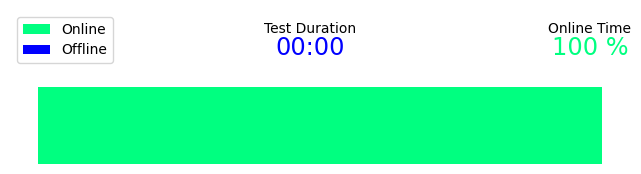

In [6]:
import network_stability

net = network_stability.NetworkTest()
# Run connectivity test.
net.connection_test_interval(seconds=1)
net.report_connection('connection.png')
# Run speed test.
net.speed_test_interval(seconds=1)
net.report_speed('speed.png')

In [21]:
from helpers.gcp_connectors import execute_bigquery_pd, execute_bigquery, query_render
 


query = query_render("launcher_metadata.sql", 
                     params={"project_id": "moten-saas-prod"})
df_study_ids = execute_bigquery(query) 


In [22]:
df_study_ids

,muscles_right,muscles_left,id,session
0,D-9,,Sami / 2023-07-03 10h26 / MATER,MORD_P5_S2_M20230703-102637
1,D-76,,Paul / 2023-06-30 15h00 / MATER,MORD_P5_S1_M20230630-150002
2,D-75,,Matthieu / 2023-05-10 15h02 / MATER,MORD_P5_S3_M20230510-150232
3,F-6,,Paul / 2023-05-10 14h55 / MATER,MORD_P5_S1_M20230510-145511
4,D-77,,Sami / 2023-05-10 14h28 / MATER,MORD_P5_S2_M20230510-142805


In [33]:
df_study_ids[["id","session"]].to_dict()

{'id': {0: 'Sami / 2023-07-03 10h26 / MATER',
  1: 'Paul / 2023-06-30 15h00 / MATER',
  2: 'Matthieu / 2023-05-10 15h02 / MATER',
  3: 'Paul / 2023-05-10 14h55 / MATER',
  4: 'Sami / 2023-05-10 14h28 / MATER'},
 'session': {0: 'MORD_P5_S2_M20230703-102637',
  1: 'MORD_P5_S1_M20230630-150002',
  2: 'MORD_P5_S3_M20230510-150232',
  3: 'MORD_P5_S1_M20230510-145511',
  4: 'MORD_P5_S2_M20230510-142805'}}

In [35]:
sessions = df_study_ids[["id","session"]].set_index('id').to_dict()['session']

In [36]:
sessions[study]

'MORD_P5_S2_M20230703-102637'

In [39]:
if "abc" in "sam abcd" :
    print("ok")
else :
    print(2)

ok
